## ML_Zoomcamp Homework3 : House Price Classification  

###  Dataset : https://www.kaggle.com/datasets/camnugent/california-housing-prices

### Homework link :  https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/03-classification/homework.md

## Data Preparation 

### Import Packages 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!python -m wget  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


Saved under housing.csv


In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

###  fill in the missing values with 0 

In [7]:
df.total_bedrooms.fillna(0, inplace = True)

#### Create a new column 'rooms_per_household' by dividing the column 'total_rooms' by the column 'households' from dataframe

In [8]:
rooms_per_household_values = df.total_rooms.div(df.households)

In [9]:
rooms_per_household_values 

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Length: 20640, dtype: float64

In [10]:
df = df.assign(rooms_per_household = rooms_per_household_values )

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


#### Create a new column 'bedrooms_per_room' by dividing the column 'total_bedrooms' by the column 'total_rooms' from dataframe

In [12]:
bedrooms_per_room_values = df.total_bedrooms.div(df.total_rooms)
bedrooms_per_room_values 

0        0.146591
1        0.155797
2        0.129516
3        0.184458
4        0.172096
           ...   
20635    0.224625
20636    0.215208
20637    0.215173
20638    0.219892
20639    0.221185
Length: 20640, dtype: float64

In [13]:
df = df.assign(bedrooms_per_room  = bedrooms_per_room_values  )

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096


#### Create a new column 'population_per_household' by dividing the column 'population' by the column 'households' from dataframe

In [15]:
population_per_household_values =df.population.div(df.households)
population_per_household_values

0        2.555556
1        2.109842
2        2.802260
3        2.547945
4        2.181467
           ...   
20635    2.560606
20636    3.122807
20637    2.325635
20638    2.123209
20639    2.616981
Length: 20640, dtype: float64

In [16]:
df = df.assign(population_per_household  = population_per_household_values )

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


### 1. What is the most frequent observation (mode) for the column ocean_proximity?

In [18]:
mode_ocean_proximity = df.ocean_proximity.mode()
mode_ocean_proximity

0    <1H OCEAN
Name: ocean_proximity, dtype: object

### Split the data (Using Scikit-Learn)

In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [21]:
df_full_train = df_train.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)
df_val = df_train.reset_index(drop = True)
df_test = df_train.reset_index(drop = True)

In [22]:
y_train = df.median_house_value.values
y_val = df.median_house_value.values
y_test = df.median_house_value.values

#### Numerical & Categorical features of train dataset

In [23]:
df_full_train.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [24]:
numerical = ['longitude','latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households','median_income',
             'rooms_per_household','bedrooms_per_room', 'population_per_household' ]

In [25]:
categorical = ['ocean_proximity']

In [26]:
df_full_train[numerical].nunique()

longitude                     803
latitude                      808
housing_median_age             52
total_rooms                  4896
total_bedrooms               1689
population                   3318
households                   1595
median_income                8730
rooms_per_household         11820
bedrooms_per_room           11786
population_per_household    11629
dtype: int64

###  2. The correlation matrix calculation

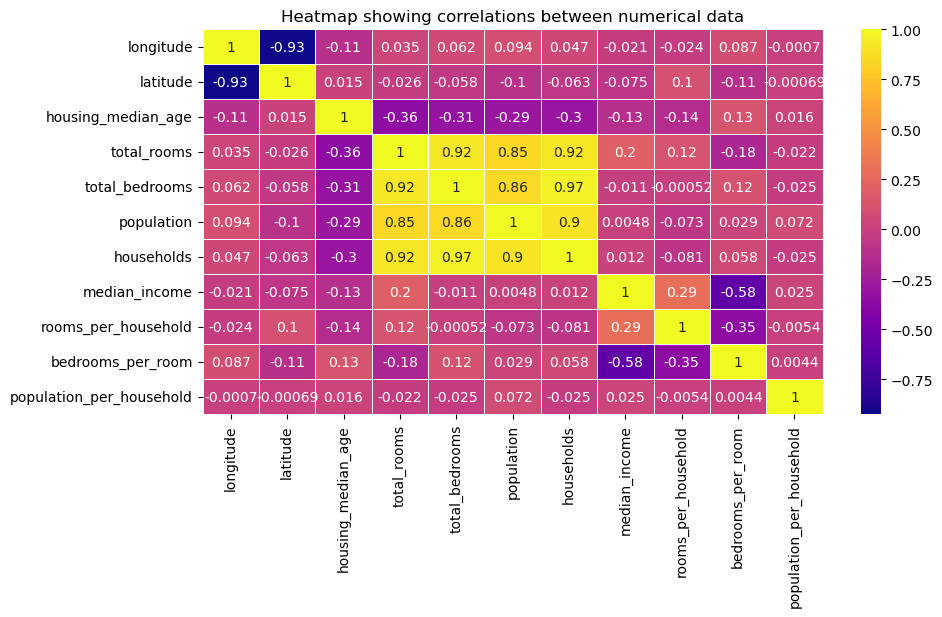

In [27]:
df_full_train[numerical].corr()
plt.figure(figsize=(10,5))  
sns.heatmap(df_full_train[numerical].corr(),annot=True,linewidths=.5, cmap="plasma")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

#### Households and total bedrooms have the biggest correlation

### Make' median_house_value' binary


In [28]:
mean = df_full_train.median_house_value.mean()
df_train['above_average'] = (df_train.median_house_value > mean).astype(int)
df_val['above_average'] = (df_val.median_house_value > mean).astype(int)
df_test['above_average'] = (df_test.median_house_value > mean).astype(int)

#### Make sure that the target value 'median_house_value' is not in the dataframe

In [29]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### 3. Calculate the mutual information score with the (binarized) price for the categorical variable 'ocean_proximity'

In [30]:
from sklearn.metrics import mutual_info_score 

In [31]:
score = mutual_info_score(df_train.above_average, df_train.ocean_proximity)
round(score, 2)

0.1

### 4. One-hot encoding
##### Use scikit-Learn to encode categorical features 

In [32]:
from sklearn.feature_extraction import DictVectorizer

In [33]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[ categorical  + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_train[ categorical  + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

#### Training the model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

In [36]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [37]:
y_pred = model.predict(X_val)

In [38]:
y_pred 

array([0, 0, 0, ..., 1, 0, 0])

In [39]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [40]:
accurancy = round(model.score(X_val, y_val), 2)

### 5. Feature elimination technique
#### Find the feature which has the smallest difference

In [41]:
dv.get_feature_names()


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [42]:
selected_features = ['total_rooms','total_bedrooms','population','households']
all_columns = numerical + categorical

In [43]:
for c in selected_features:
    subset = selected_features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    acc = model.score(X_val, y_val)
    print(c, abs(accurancy - acc) , acc )

total_rooms 0.21113695090439277 0.6188630490956072
total_bedrooms 0.17714147286821702 0.6528585271317829
population 0.1899806201550387 0.6400193798449613
households 0.16317183462532292 0.666828165374677


####  feature has the smallest difference : total_rooms

### 6. Regression with Scikit-Learn. What's the best alpha?²

In [44]:
#split the data
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Target values 
T_train =  np.log1p(df_train['median_house_value'].values)
T_val =  np.log1p(df_val['median_house_value'].values)
T_test =  np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Ridge Regression 

In [45]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [46]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


In [47]:
for alph in [0, 0.01, 0.1, 1, 10]:
    
    model = Ridge(alpha=alph,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(T_val, y_pred))
    
    rmse = round(score, 3)
    print (alph, "\t", rmse)

0 	 11.699
0.01 	 11.699
0.1 	 11.699
1 	 11.699
10 	 11.699


### Same RMSE for all the alphas